## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [61]:
import pandas as pd
import numpy as np

In [62]:
ratings = pd.read_csv('../data/ratings.csv', sep='|')
movies = pd.read_csv('../data/movies.csv', sep='|')

In [63]:

ratings = ratings.groupby('movie_id').count().reset_index()
ratings = ratings[['movie_id', 'rating']]
ratings.columns = ['movie_id', 'count']
# get count > 2500
ratings_filtered = ratings[ratings['count'] > 2500]



In [64]:
def is_on_ids(id, ids):
    return id in ids

In [65]:
ratings_filtrados_con_nombre = ratings_filtered.merge(movies, on='movie_id', how='left')
ratings_filtrados_con_nombre

,movie_id,count,title,genres
0,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
2,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
3,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller
4,608,2513,Fargo (1996),Crime|Drama|Thriller
5,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
6,1198,2514,Raiders of the Lost Ark (1981),Action|Adventure
7,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
8,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
9,1580,2538,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi


Pídele a tu experta la función de verificación `visualizar_boxplots` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado. Tu `DataFrame` debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

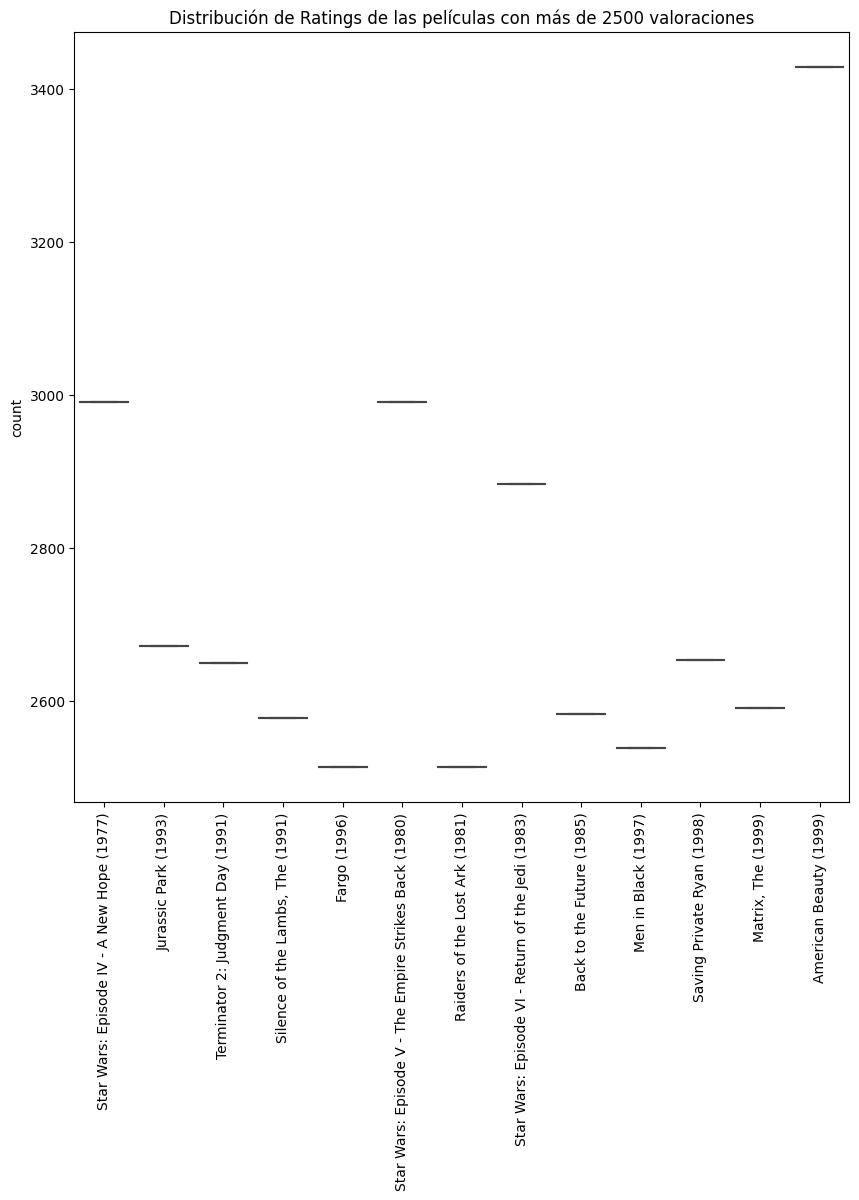

In [71]:
# Pega aquí la función de verificación 
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(x='title', y='count', data=ratings_filtrados_con_nombre)
    ax.set(xlabel=None, ylabel='count')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)